# Patchify and plot images

TODO:

- [ ] We cannot assume a unique filename, this needs to be changed so that we add date (dirname): `plantID_data_filename`
- [ ] In annotation, it seems that we assume that all parent images are stored in one directory. This should be changed to a more flexible way, e.g., "/path/to/\*/\*.png"
- [ ] Count the number of pixels in parent images (x and y)
- [ ] Add a warning/error when the number of pixels in x or y directions are different from what we expect.
- [ ] Colorbars, transparency for out of the range patches?
- [ ] normalize_mean and normalize_std in 003_train_classifier need to be set based on the plant images.
- [ ] Think about the data augmentaiton and transformations for the plant images, e.g., the intensities or brightness, mimic the changes in light/brightness.
- [ ] Capture some metadata (e.g., date, or time interval) in the image path so that we can later use the metadata + predictions, e.g., number of branch patches as a function of time, or number of flower patches ... 
- [ ] Check the outputs of model inference, we need to output the patch ID
- [ ] Multiple views, compare different side-views, they should be the same scale (for each side view), transfer learning
- [ ] Label plant patches
- [ ] Change over time, which features emerge first,
- [ ] Chain of classifiers? First classifier would decide plant/no and then classify the flower/greenspace, then the shape of the features. Classify green features into different groups.

Refer to [the installation section in README](https://github.com/Living-with-machines/MapReader#installation) to install `mapreader`.

In [1]:
# solve issue with autocomplete
%config Completer.use_jedi = False

%load_ext autoreload
%autoreload 2
%matplotlib inline

## Unique filenames for parent images

WIP For creating unique file names with plant ID and date from the directory names. Not needed for running plant classification example

In [ ]:
##from glob import glob
##import os
##import shutil

##list_imgs = glob("./dataset/example_whole_plant/2*/*v*png")
##print(list_imgs)
##print(os.path.normpath(list_imgs[0]).split(os.sep))

In [ ]:
##for one_img in list_imgs:
    ##fn_split = os.path.normpath(one_img).split(os.sep)
    ##fn_cp = os.path.join("dataset", "example_whole_plant", f"{fn_split[-2]}_{fn_split[-1]}")
    ##shutil.copy(one_img, fn_cp)

## Load images

Example images taken from the openly accessible CVPPP2014_LSV_training_data dataset available from https://www.plant-phenotyping.org/datasets-download

In [2]:
from mapreader import loader
path2images = "./dataset/open_access_plant/*.png"
myimgs = loader(path2images)

In [3]:
# len() shows the total number of images currently read (or sliced, see below)
print(f"Number of images: {len(myimgs)}")

Number of images: 2


In [4]:
# To get more information
print(myimgs)

#images: 2

#parents: 2
2014-06-06_plant001_rgb.png
2014-07-17_plant047_rgb.png

#children: 0



## Plot sample images

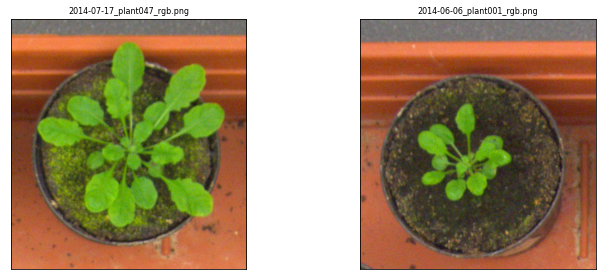

In [5]:
myimgs.show_sample(num_samples=2, tree_level="parent")

## Show one image

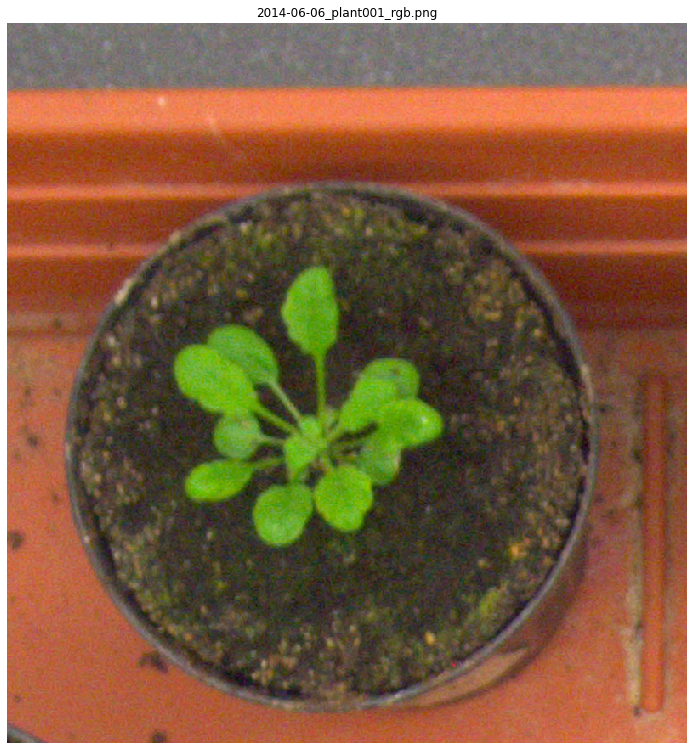

In [6]:
# list of all images (and not patches)
all_imgs = myimgs.list_parents()

# list of all patches (i.e., patches)
# all_patches = myimgs.list_children()

myimgs.show(all_imgs[0], 
            tree_level="parent", 
            # to change the resolution of the image for plotting
            image_width_resolution=800)

## Slice images

In [7]:
# `method` can also be set to meters
myimgs.sliceAll(path_save="./dataset/eg_slice_50_50", 
                slice_size=50, # in pixels
                square_cuts=False, 
                verbose=False,
                method="pixel")

Slicing dataset\open_access_plant\2014-06-06_plant001_rgb.png
----------------------------------------
Slicing dataset\open_access_plant\2014-07-17_plant047_rgb.png
----------------------------------------


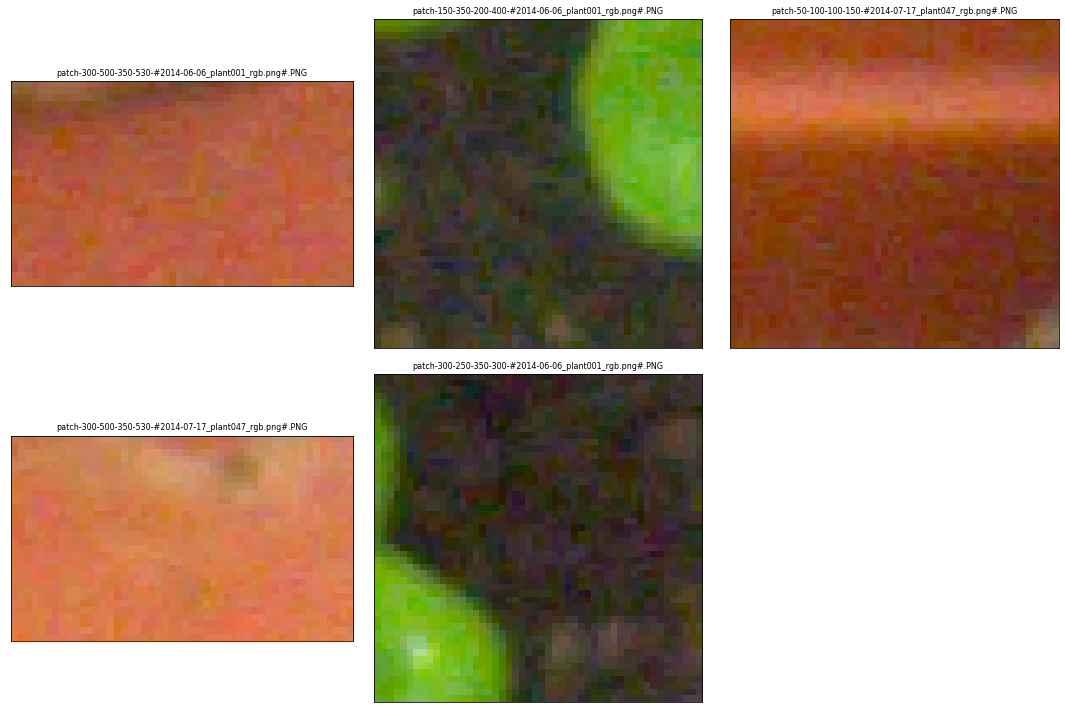

In [8]:
myimgs.show_sample(5, tree_level="child")

## Show one image and its patches

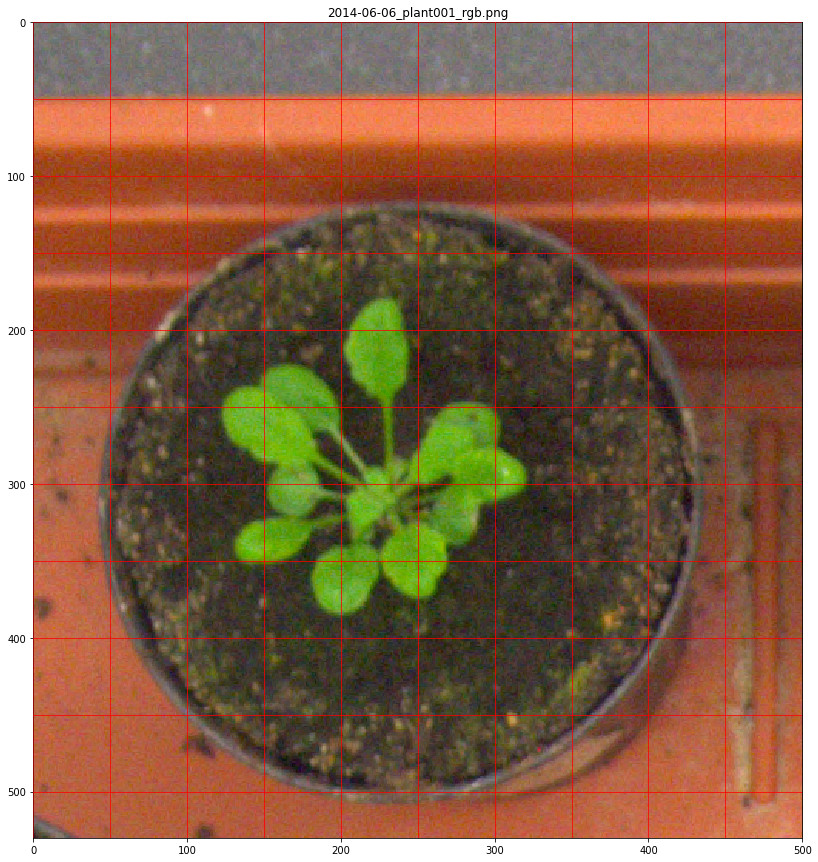

In [9]:
# List of all images
all_imgs = list(myimgs.images["parent"].keys())

myimgs.show_par(all_imgs[0], 
                border=True, 
                plot_parent=True,
                figsize=(15, 15))

## Calculate mean and standard-deviation of pixel intensities

`calc_pixel_stats` method can be used to calculate mean and standard-deviation of pixel intensities of each `child` (i.e., `patch`) in a `parent` image.

In [10]:
# if parent_id="XXX", only compute pixel stats for that parent
myimgs.calc_pixel_stats()

----------
[INFO] calculate pixel stats for image: 2014-06-06_plant001_rgb.png
----------
[INFO] calculate pixel stats for image: 2014-07-17_plant047_rgb.png


In [11]:
imgs_pd, patches_pd = myimgs.convertImages(fmt="dataframe")

In [12]:
imgs_pd.head()

,parent_id,image_path,children
2014-06-06_plant001_rgb.png,None,C:\Users\ecorcoran\classification_phenotype_te...,[patch-0-0-50-50-#2014-06-06_plant001_rgb.png#...
2014-07-17_plant047_rgb.png,None,C:\Users\ecorcoran\classification_phenotype_te...,[patch-0-0-50-50-#2014-07-17_plant047_rgb.png#...


In [13]:
patches_pd.head()

,parent_id,image_path,min_x,min_y,max_x,max_y,mean_pixel_R,mean_pixel_G,mean_pixel_B,mean_pixel_RGB,mean_pixel_A,std_pixel_R,std_pixel_G,std_pixel_B,std_pixel_RGB,std_pixel_A
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.PNG,2014-06-06_plant001_rgb.png,C:\Users\ecorcoran\classification_phenotype_te...,0,0,50,50,0.478751,0.453997,0.447296,0.460015,1.0,0.046421,0.024224,0.040283,0.040470,0.0
patch-50-0-100-50-#2014-06-06_plant001_rgb.png#.PNG,2014-06-06_plant001_rgb.png,C:\Users\ecorcoran\classification_phenotype_te...,50,0,100,50,0.487391,0.460494,0.447892,0.465259,1.0,0.053566,0.024110,0.040874,0.044480,0.0
patch-100-0-150-50-#2014-06-06_plant001_rgb.png#.PNG,2014-06-06_plant001_rgb.png,C:\Users\ecorcoran\classification_phenotype_te...,100,0,150,50,0.490019,0.460612,0.446695,0.465775,1.0,0.059013,0.022834,0.042598,0.047599,0.0
patch-150-0-200-50-#2014-06-06_plant001_rgb.png#.PNG,2014-06-06_plant001_rgb.png,C:\Users\ecorcoran\classification_phenotype_te...,150,0,200,50,0.495351,0.459379,0.449630,0.468120,1.0,0.064722,0.022608,0.044579,0.051144,0.0
patch-200-0-250-50-#2014-06-06_plant001_rgb.png#.PNG,2014-06-06_plant001_rgb.png,C:\Users\ecorcoran\classification_phenotype_te...,200,0,250,50,0.500515,0.461638,0.449233,0.470462,1.0,0.071924,0.023801,0.048196,0.056256,0.0


In [14]:
patches_pd["mean_pixel_RGB"].mean()

0.3701558

Now that we have calculated the mean and standard-deviation of pixel intensities, we can plot them using `showAll` method. Note that in the following cell, we only plot one image (`all_imgs[1]`):

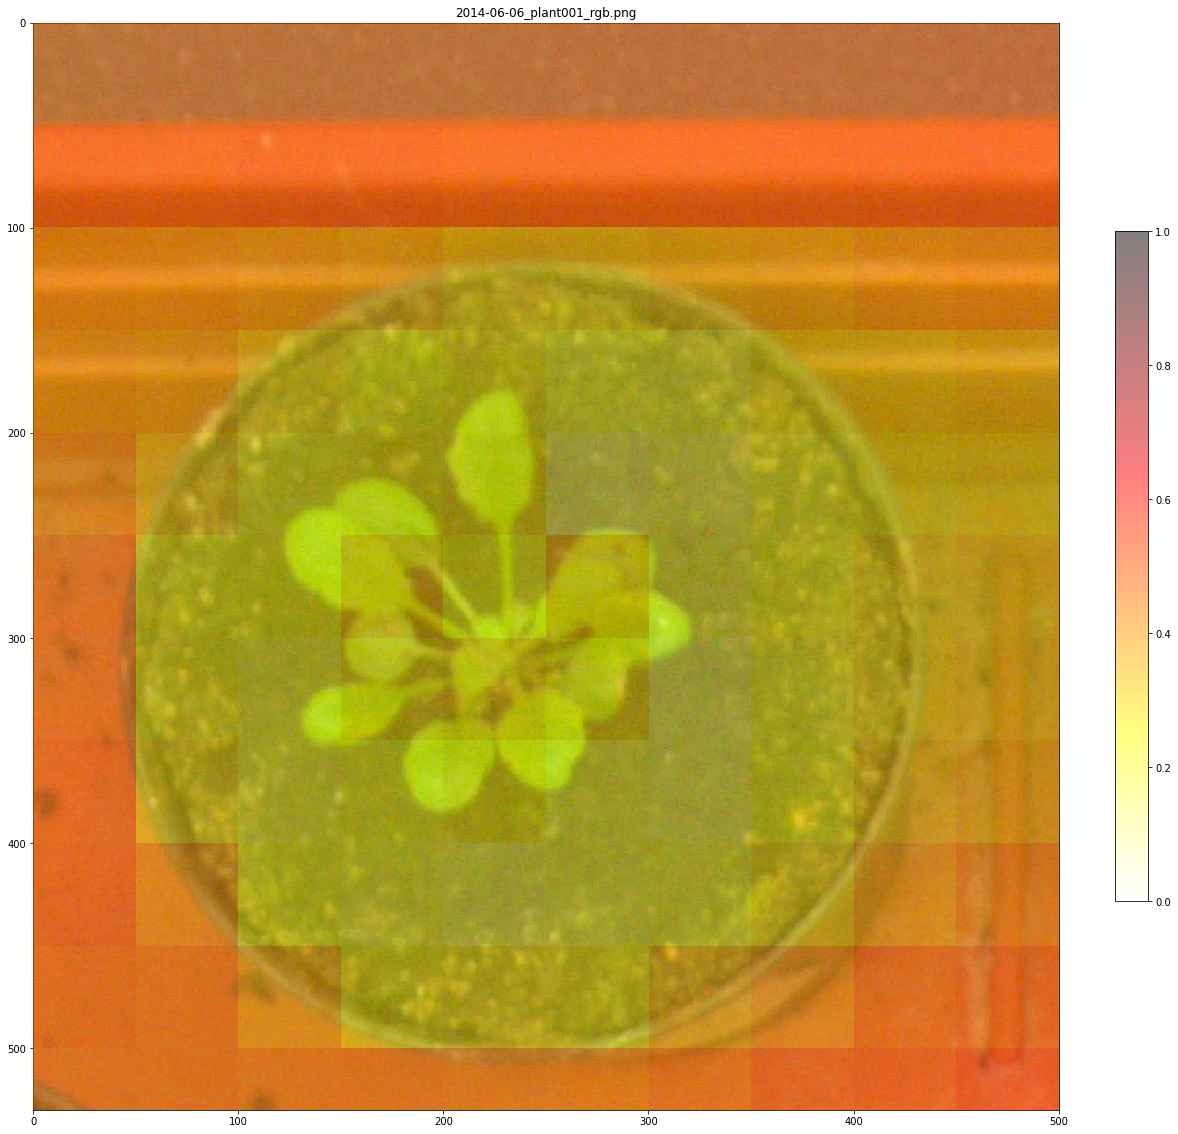

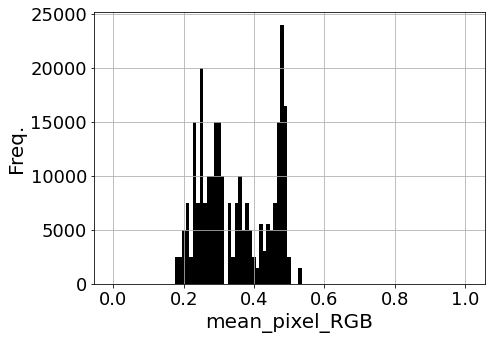

In [15]:
# List of all images
all_imgs = list(myimgs.images["parent"].keys())

# To plot the calculated means, use 
# value="mean_pixel"
myimgs.show_par(all_imgs[0], 
                value="mean_pixel_RGB",
                border=False,
                plot_parent=True,
                vmin=0.0, vmax=1.0, 
                figsize=(20, 20),
                alpha=0.5, 
                colorbar="hot_r")